# Problems Notebook

This notebook contains my work of the assessment in Applied Statistics module in the Higher Diploma in Data Analytics course. 
The notebook covers four main problems: 




## Problem 1: Extending the Lady Tasting Tea:

Let's extend the Lady Tasting Tea experiment as follows. The original experiment has 8 cups: 4 tea-first and 4 milk-first. Suppose we prepare 12 cups: 8 tea-first and 4 milk-first. A participant claims they can tell which was poured first.

Simulate this experiment using numpy by randomly shuffling the cups many times and calculating the probability of the participant correctly identifying all cups by chance. Compare your result with the original 8-cup experiment.

In your notebook, explain your simulation process clearly, report and interpret the estimated probability, and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.

### Solution to the Problem 1

In [1]:
# Import necessary libraries

# for mathematical functions
# see https://docs.python.org/3/library/math.html
import math

# for combinatorial functions
# see https://docs.python.org/3/library/itertools.html
import itertools

# for random number generation
# see https://www.w3schools.com/python/module_random.asp
import random

# for numerical operations
# see https://www.w3schools.com/python/numpy/numpy_intro.asp
import numpy as np

# for data visualization and plotting
# see https://www.w3schools.com/python/matplotlib_pyplot.asp
import matplotlib.pyplot as plt

#### Mathematical Concepts

https://docs.python.org/3/library/math.html#math.comb

#### Cups of Tea in Original Experiment

In [2]:
# Number of cups of tea. All cups are identical. 
num_cups= 8

# Number of cups with tea first
num_tea_first = 4

# Number of cups with milk first
num_milk_first= 4

In [3]:
# Number of ways to select 8 cups from 12

tea_ways = math.comb(num_cups, num_tea_first)

print(f'Number of ways to select cups is {tea_ways}')

Number of ways to select cups is 70


#### Cups of Tea in Extended Experiment

In [4]:
# Number of cups of tea. All cups are identical. 
num_cups_ex = 12

# Number of cups with tea first
num_tea_first_ex = 8

# Number of cups with milk first
num_milk_first_ex = 4

In [5]:
# Number of ways to select 8 cups from 12

tea_ways_ex = math.comb(num_cups_ex, num_tea_first_ex)

print(f'Number of ways to select cups is {tea_ways_ex}')

Number of ways to select cups is 495


In [6]:
# number of ways to select 4 cups from 12
milk_ways_ex = math.comb(num_cups_ex, num_milk_first_ex)

print(f'Number of ways to select cups is {milk_ways_ex}')

Number of ways to select cups is 495


Both results shows 495, however these results are not exaclty the same. 

If we choose 8 cups to have tea first, it leaves us with remaining 4 cups with milk. If we choose 4 cups with milk, we will have 8 cups remaining. 

Let's check that carefully. 

##### Select 8 cups to have tea first.

Label the 12 cups of tea from the extened experiment `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9`, `10`, `11`, `12`. 

We select 8 cups to have tea in first.

For example, we might select `1`, `2`, `4`, `6`, `9`, `10`, `11` and `12`.

Visualize having eight saucers where we place eight of the cups.

How many ways are there to select 8 cups from 12?

Cups: `1 2 3 4 5 6 7 8 9 10 11 12`

Saucers: `_ _ _ _ _ _ _ _`

In [7]:
# Total number of ways of selecting 8 cups from 12, keeping them in order.
ways_ordered_tea = 12 * 11 * 10 * 9 * 8 * 7 * 6 * 5

# Show.
ways_ordered_tea

19958400

The order doesn't matter. If cups `1`, `2`, `4`, `6`, `9`, `10`, `11` and `12`. are selected in order it is the same result as if `12`, `11`, `9`, `10`, `2`, `6`, `4` and `1`. were selected, or any other permutation.

`1 2 4 6 9 10 11 12`

`12 11 9 10 2 6 4`

`_ _ _ _ _ _ _ _`

In [8]:
# No of ways of shuffling 8 cups.
no_shuffles_tea = 8 * 7 * 6 * 5 * 4 * 3 * 2 * 1

# Show.
no_shuffles_tea

40320

In [9]:
# No of combinations ups with tea.
no_comb_tea = ways_ordered_tea // no_shuffles_tea

# Show.
no_comb_tea

495

##### Select 4 cups to have milk first.

Again, we have our labeled 12 cups of tea `1`, `2`, `3`, `4`, `5`, `6`, `7`, `8`, `9`, `10`, `11`, `12`. 

But now we select 4 cups to have milk in first. We start again, so we still have 12 cups.

Let's select `3`, `5`, `7`, and `8`.

We place them on the other four saucers where we place four cups on, where we guess the milk is first. 

How many ways are there to select 4 cups from 12?

Cups: `1 2 3 4`

Saucers: `_ _ _ _`

In [10]:
# Total number of ways of selecting 4 cups from 12, keeping them in order.
ways_ordered_milk = 12 * 11 * 10 * 9

# Show.
ways_ordered_milk

11880

And again, the order doesn't matter. 

In [11]:
# No of ways of shuffling four cups.
no_shuffles_milk = 4 * 3 * 2 * 1

# Show.
no_shuffles_milk

24

In [12]:
# No of combinations milk.
no_combs_ex = ways_ordered_milk // no_shuffles_milk

# Show.
no_combs_ex

495

There are 495 ways to select 8 cups with tea, which is similar as choosing 4 cups with milk. It is just viewed from the opposite perspective.


In mathematics, the `math.comb()` function is called the *choose* function.

It is written and calculated as

$\binom{n}{k} = \frac{n!}{k!(n-k)!}$.

In [13]:
# Number of cups of tea in total.
n = 12

In [14]:
# Number of cups of tea with milk in first.
k = 8

## math.factorial

https://docs.python.org/3.12/library/math.html#math.factorial

Mathematically denoted as `n!`.

Multiply all positive integers from `n` down to 1.


`n! = n x (n - 1) x (n - 2) x ... x 1`

e.g. `5! = 5 x 4 x 3 x 2 x 1 = 120`

In [15]:
# Twelve factorial.
math.factorial(n)

479001600

In [16]:
# Four factorial.
math.factorial(k)

40320

In [17]:
# Four factorial.
math.factorial(n - k)

24

In [18]:
# No of ways of selecting k objects from n without replacement and without order.
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

495

### Ordering of Results


https://docs.python.org/3/library/itertools.html#itertools.combinations

Generate the possibilities 

In [19]:
# the cup labels
labels = list(range(num_cups_ex))

# show
labels



[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [20]:
# Show the different ways of selecting no_cups_milk_first out of no_cups cups of tea.
combs = list(itertools.combinations(labels, num_tea_first_ex))

# Show.
combs

[(0, 1, 2, 3, 4, 5, 6, 7),
 (0, 1, 2, 3, 4, 5, 6, 8),
 (0, 1, 2, 3, 4, 5, 6, 9),
 (0, 1, 2, 3, 4, 5, 6, 10),
 (0, 1, 2, 3, 4, 5, 6, 11),
 (0, 1, 2, 3, 4, 5, 7, 8),
 (0, 1, 2, 3, 4, 5, 7, 9),
 (0, 1, 2, 3, 4, 5, 7, 10),
 (0, 1, 2, 3, 4, 5, 7, 11),
 (0, 1, 2, 3, 4, 5, 8, 9),
 (0, 1, 2, 3, 4, 5, 8, 10),
 (0, 1, 2, 3, 4, 5, 8, 11),
 (0, 1, 2, 3, 4, 5, 9, 10),
 (0, 1, 2, 3, 4, 5, 9, 11),
 (0, 1, 2, 3, 4, 5, 10, 11),
 (0, 1, 2, 3, 4, 6, 7, 8),
 (0, 1, 2, 3, 4, 6, 7, 9),
 (0, 1, 2, 3, 4, 6, 7, 10),
 (0, 1, 2, 3, 4, 6, 7, 11),
 (0, 1, 2, 3, 4, 6, 8, 9),
 (0, 1, 2, 3, 4, 6, 8, 10),
 (0, 1, 2, 3, 4, 6, 8, 11),
 (0, 1, 2, 3, 4, 6, 9, 10),
 (0, 1, 2, 3, 4, 6, 9, 11),
 (0, 1, 2, 3, 4, 6, 10, 11),
 (0, 1, 2, 3, 4, 7, 8, 9),
 (0, 1, 2, 3, 4, 7, 8, 10),
 (0, 1, 2, 3, 4, 7, 8, 11),
 (0, 1, 2, 3, 4, 7, 9, 10),
 (0, 1, 2, 3, 4, 7, 9, 11),
 (0, 1, 2, 3, 4, 7, 10, 11),
 (0, 1, 2, 3, 4, 8, 9, 10),
 (0, 1, 2, 3, 4, 8, 9, 11),
 (0, 1, 2, 3, 4, 8, 10, 11),
 (0, 1, 2, 3, 4, 9, 10, 11),
 (0, 1, 2, 3, 5, 6, 7, 8)

In [21]:
# Number of combinations.
len(combs)

495

In [22]:
# Probability of selecting one particular combination.

1/len(combs)

0.00202020202020202

In [23]:
# Select eight cups at random to put tea in first.
# https://docs.python.org/3/library/random.html#random.sample
labels_tea = random.sample(labels, 8)

# Sort, inplace.
labels_tea.sort()

# Show.
labels_tea

[0, 2, 4, 5, 6, 7, 8, 11]

In [24]:
# Turn labels_tea into a set.
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_tea)

{0, 2, 4, 5, 6, 7, 8, 11}

In [25]:
# Calculate the overlap between each element of combs and labels_tea.

no_overlaps = []


#loop through each combination in combs.
for comb in combs:
  # Turn comb into a set.
  s1 = set(comb)
  # Turn labels_tea into a set.
  s2 = set(labels_tea)
  # Figure out where they overlap.
  overlap = s1.intersection(s2)
  # Show the combination and the overlap.
  print(comb, len(overlap), overlap)
  # Append overlap to no_overlaps.
  no_overlaps.append(len(overlap))

(0, 1, 2, 3, 4, 5, 6, 7) 6 {0, 2, 4, 5, 6, 7}
(0, 1, 2, 3, 4, 5, 6, 8) 6 {0, 2, 4, 5, 6, 8}
(0, 1, 2, 3, 4, 5, 6, 9) 5 {0, 2, 4, 5, 6}
(0, 1, 2, 3, 4, 5, 6, 10) 5 {0, 2, 4, 5, 6}
(0, 1, 2, 3, 4, 5, 6, 11) 6 {0, 2, 4, 5, 6, 11}
(0, 1, 2, 3, 4, 5, 7, 8) 6 {0, 2, 4, 5, 7, 8}
(0, 1, 2, 3, 4, 5, 7, 9) 5 {0, 2, 4, 5, 7}
(0, 1, 2, 3, 4, 5, 7, 10) 5 {0, 2, 4, 5, 7}
(0, 1, 2, 3, 4, 5, 7, 11) 6 {0, 2, 4, 5, 7, 11}
(0, 1, 2, 3, 4, 5, 8, 9) 5 {0, 2, 4, 5, 8}
(0, 1, 2, 3, 4, 5, 8, 10) 5 {0, 2, 4, 5, 8}
(0, 1, 2, 3, 4, 5, 8, 11) 6 {0, 2, 4, 5, 8, 11}
(0, 1, 2, 3, 4, 5, 9, 10) 4 {0, 2, 4, 5}
(0, 1, 2, 3, 4, 5, 9, 11) 5 {0, 2, 4, 5, 11}
(0, 1, 2, 3, 4, 5, 10, 11) 5 {0, 2, 4, 5, 11}
(0, 1, 2, 3, 4, 6, 7, 8) 6 {0, 2, 4, 6, 7, 8}
(0, 1, 2, 3, 4, 6, 7, 9) 5 {0, 2, 4, 6, 7}
(0, 1, 2, 3, 4, 6, 7, 10) 5 {0, 2, 4, 6, 7}
(0, 1, 2, 3, 4, 6, 7, 11) 6 {0, 2, 4, 6, 7, 11}
(0, 1, 2, 3, 4, 6, 8, 9) 5 {0, 2, 4, 6, 8}
(0, 1, 2, 3, 4, 6, 8, 10) 5 {0, 2, 4, 6, 8}
(0, 1, 2, 3, 4, 6, 8, 11) 6 {0, 2, 4, 6, 8, 11}
(0, 1, 2,

In [26]:
# Show the overlaps.
print(no_overlaps)

[6, 6, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 4, 5, 5, 6, 5, 5, 6, 5, 5, 6, 4, 5, 5, 5, 5, 6, 4, 5, 5, 4, 5, 5, 4, 6, 5, 5, 6, 5, 5, 6, 4, 5, 5, 5, 5, 6, 4, 5, 5, 4, 5, 5, 4, 5, 5, 6, 4, 5, 5, 4, 5, 5, 4, 4, 5, 5, 4, 4, 7, 6, 6, 7, 6, 6, 7, 5, 6, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 4, 5, 5, 5, 5, 6, 4, 5, 5, 4, 5, 5, 4, 5, 5, 6, 4, 5, 5, 4, 5, 5, 4, 4, 5, 5, 4, 4, 5, 5, 6, 4, 5, 5, 4, 5, 5, 4, 4, 5, 5, 4, 4, 4, 5, 5, 4, 4, 4, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 7, 6, 6, 7, 6, 6, 7, 5, 6, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 7, 8, 6, 7, 7, 6, 7, 7, 6, 6, 7, 7, 6, 6, 6, 7, 7, 6, 6, 6, 6, 7, 7, 6, 6, 6, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 7, 7, 6, 6, 6, 6, 6, 6, 5, 5, 

In [27]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([4, 5, 6, 7, 8]), array([ 70, 224, 168,  32,   1], dtype=int64))

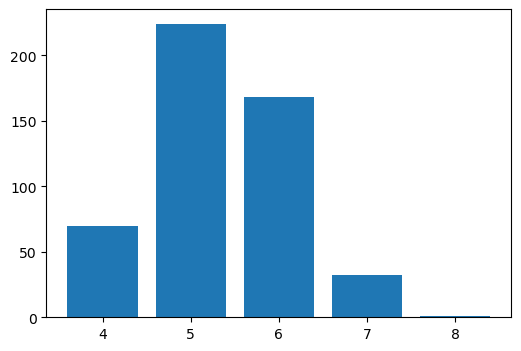

In [28]:
# Create a figure.
fig, ax = plt.subplots(figsize=(6, 4))

# Bar chart.
ax.bar(counts[0], counts[1]);

Chances are that the lady will select 8 cups in which 5 are right is 224 over 495 chances

In [29]:
# The probability that she (randomly) selects the four correct cups.
1 / 495

0.00202020202020202

In [30]:
# The probability that she (randomly) selects at least six correct cups.
(168 + 1) / 495

0.3414141414141414

bit over one in a third chance

Simulation of the 'lady tasting tea' experiment.

In [ ]:
trials = 50000  # number of simulated shuffles
random.seed(42) # for reproducibility

# Simulation function
def simulate_correct_counts(n, k, trials):
    correct_counts = []  # list to store how many cups are correct each time

    for i in range(trials):
        # 1: Randomly assign which cups are milk first
        true_milk = set(random.sample(range(n), k))

        # 2: Lady randomly guesses which k cups are milk first
        guess_milk = set(random.sample(range(n), k))

        # 3: Count how many cups were guessed correctly
        num_correct = len(true_milk.intersection(guess_milk))

        # 4: Store the result
        correct_counts.append(num_correct)

    return correct_counts


In [32]:
# Run simulation for both experiments
correct_8 = simulate_correct_counts(num_cups, num_milk_first, trials)
correct_12 = simulate_correct_counts(num_cups_ex, num_milk_first_ex, trials)


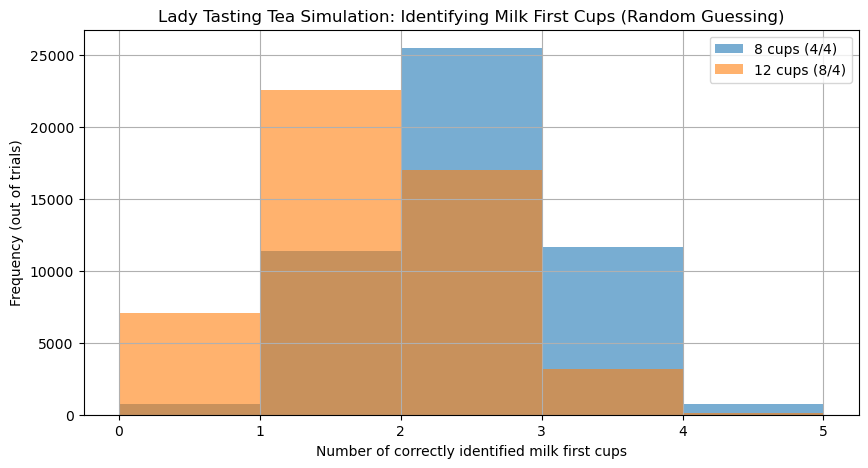

Probability of perfect guessing (8 cups):  0.014380 ≈ 1/70
Probability of perfect guessing (12 cups): 0.001800 ≈ 1/495


In [33]:
# Plot results

plt.figure(figsize=(10, 5))

plt.hist(correct_8, bins=range(num_milk_first + 2), alpha=0.6, label='8 cups (4/4)')
plt.hist(correct_12, bins=range(num_milk_first_ex + 2), alpha=0.6, label='12 cups (8/4)')

plt.xlabel("Number of correctly identified milk first cups")
plt.ylabel("Frequency (out of trials)")
plt.title("Lady Tasting Tea Simulation: Identifying Milk First Cups (Random Guessing)")
plt.legend()
plt.grid(True)
plt.show()


# Print probabilities of perfect guessing
p_all_correct_8 = correct_8.count(num_milk_first) / trials
p_all_correct_12 = correct_12.count(num_milk_first_ex) / trials

print(f"Probability of perfect guessing (8 cups):  {p_all_correct_8:.6f} ≈ 1/{math.comb(8,4)}")
print(f"Probability of perfect guessing (12 cups): {p_all_correct_12:.6f} ≈ 1/{math.comb(12,4)}")



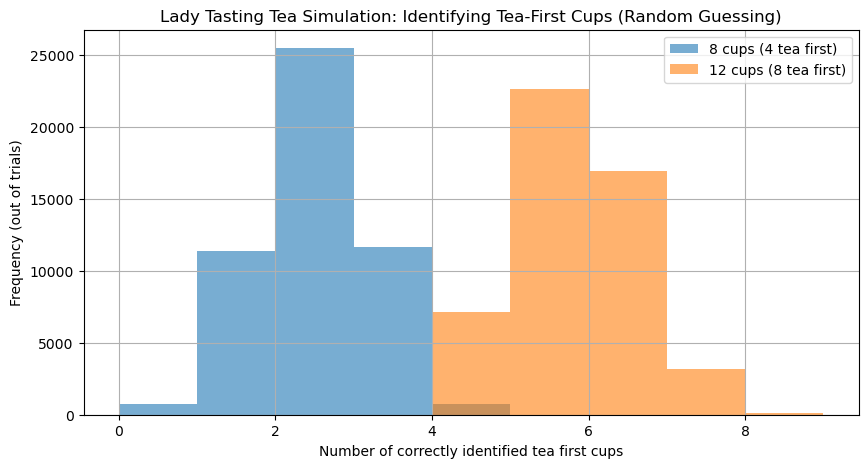

Probability of perfect guessing (8 cups, tea-first):  0.014380 ≈ 1/70
Probability of perfect guessing (12 cups, tea-first): 0.001820 ≈ 1/495


In [34]:

trials = 50000

random.seed(42)

# Simulation function for tea first guesses
def simulate_correct_counts_tea_first(n, k, trials):
    correct_counts = []
    for _ in range(trials):
        # Randomly assign which cups are tea-first
        true_tea = set(random.sample(range(n), k))
        # Lady randomly guesses which cups are tea-first
        guess_tea = set(random.sample(range(n), k))
        # Count how many were correctly guessed
        num_correct = len(true_tea.intersection(guess_tea))
        correct_counts.append(num_correct)
    return correct_counts

# Run simulations
correct_tea_8 = simulate_correct_counts_tea_first(num_cups, num_tea_first, trials)
correct_tea_12 = simulate_correct_counts_tea_first(num_cups_ex, num_tea_first_ex, trials)

#  Plot results
plt.figure(figsize=(10, 5))

plt.hist(correct_tea_8, bins=range(num_tea_first + 2), alpha=0.6, label='8 cups (4 tea first)')
plt.hist(correct_tea_12, bins=range(num_tea_first_ex + 2), alpha=0.6, label='12 cups (8 tea first)')

plt.xlabel("Number of correctly identified tea first cups")
plt.ylabel("Frequency (out of trials)")
plt.title("Lady Tasting Tea Simulation: Identifying Tea-First Cups (Random Guessing)")
plt.legend()
plt.grid(True)
plt.show()

#Probability of perfect guessing
p_all_correct_tea_8 = correct_tea_8.count(num_tea_first) / trials
p_all_correct_tea_12 = correct_tea_12.count(num_tea_first_ex) / trials

print(f"Probability of perfect guessing (8 cups, tea-first):  {p_all_correct_tea_8:.6f} ≈ 1/{math.comb(8,4)}")
print(f"Probability of perfect guessing (12 cups, tea-first): {p_all_correct_tea_12:.6f} ≈ 1/{math.comb(12,8)}")


The histogram shows the distribution of correct identifications expected under random guessing for two versions of the Lady Tasting Tea experiment: one with 8 cups (4 milkfirst) and another with 12 cups (4 milk first). In both cases, most simulated trials resulted in around two correct guesses, while perfect identification of all milk-first cups was extremely rare. The probability of guessing perfectly by chance is approximately 1 in 70 (1.4%) for the 8-cup test and 1 in 495 (0.2%) for the 12-cup test. This means that if a participant were to correctly identify all milk-first cups, such an outcome would be very unlikely under random guessing. Therefore, a perfect result would provide strong evidence that the participant can genuinely distinguish the pouring order rather than relying on chance.

## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution. For each sample, compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). Plot histograms of both sets of values on the same axes with transparency. Describe the differences you see. Explain how you expect these differences to change if the sample size is increased.

## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false. For each mean difference
$ d =0,0.1,0.2,…,1.0 $, repeat the following simulation 1,000 times:


* Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.
* Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
* Record the proportion of times the null hypothesis is not rejected.


Plot this proportion against $d$, and explain how the type II error rate changes as the difference in means increases.

## Problem 4: ANOVA

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

* Perform a one-way ANOVA to test whether all three means are equal.
* Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
* Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.

Importing nessesary libraries

In [35]:
import numpy as np

***
End